# Otsu's threshold method (optional)

In this notebook you will learn how to write your own implementation of Otsu's threshold method ([Otsu et al., IEEE, 1979)](https://ieeexplore.ieee.org/document/4310076). It will allow you to apply many of the previously introduced concepts of Python programing for image data.

## The algorithm
Otsu's threshold method selects a threshold value to which all pixels in the image are compared. The pixels with gray values below and above the threshold are denoted $A$ and $B$. For a given threshold $t$ between the image's minimal and maximal gray value $t \in ]min(image), max(image)[$, the method calculates the weighted variances $\eta_w$ of pixels in $A$ and $B$:

$\eta_{w, A} = \frac{n_A}{N} \cdot Var(A)$

$\eta_{w, B} = \frac{n_B}{N} \cdot Var(B)$

where $n_A$, $n_B$ and $N$ represent the number of pixels in $A$ and $B$ and $A \cup B$, respectively. The weighted variances are then added:

$\eta_w = \eta_{w, A} + \eta_{w, B}$

This calculation is repeated for every possible threshold value $t$. The optimal threshold is then found when $\eta_w(t)$ is minimal.

## Steps to implement the alorithm:

1. Find the minimal and maximal gray values in the image.
2. Write a `for`-loop that iterates over all possible threshold values.
3. For every possible threshold, retrieve the pixels that are above ($A$) or below ($B$) the respectve threshold value.
4. Calculate the summed weighted variance $\eta_{w} = \eta_{w, A} + \eta_{w, B}$ for every threshold value.
5. Find the threshold value with the lowest variance.

In [1]:
from skimage import data, filters
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# We will use this image as example data
image = data.human_mitosis()

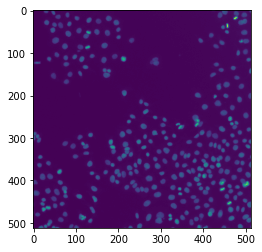

In [3]:
plt.imshow(image)

First, we need to find the minimal and maximal gray values of the image data stored in the variable `image` and create an array of possible threshold values:

In [ ]:
min_value = 
max_value = 

threshold_values = np.arange(min_value, max_value, 1)
print(threshold_values)

We create this empty list to store our calculated summed weighted variances

In [ ]:
summed_weighted_variance = []

Before writing the for loop for all threshold values, try to implement the calculation of the summed weighted variance for a given single threshold between `min_value` and `max_value`. First, try to find the pixels with intensities above ($A$) and below ($B$) this threshold:

*Tipp: Convert the image to a binary image first!*

In [ ]:
values_below = 
values_above = 

Next, calculate the variances and their weights for $A$ and $B$:

*Tip: Search online whether numpy may have a [convenient function](https://numpy.org/doc/stable/reference/routines.statistics.html) for this!*

In [ ]:
variance_below = 
variance_above = 

weight_below = 
weight_above = 

Now, put everything you have just written into a for loop:

In [ ]:
variances_below = []
variances_above = []
for threshold in threshold_values:
    
    binary_below = 
    binary_above = 
    
    values_below = 
    values_above = 
    
    weight_below = 
    weight_above = 
    
    _variance_above =  # calculate the variance of pixels above the threshold
    _variance_below =  # calculate the variance of pixels below the threshold
    
    variances_above.append(_variance_above * weight_above)
    variances_below.append(_variance_below * weight_below)

Next, we need to add the weighted variances for every threshold value. For numpy arrays, we can simply add two arrays element-wise with the following syntax:

```
c = a + b
```

...but this will not work for the Python lists `variance_below` and `variance_above`. Convert them to numpy arrays!

In [ ]:
variances_below_array = 
variances_above_array = 

In [ ]:
fig, ax = plt.subplots()
ax.plot(threshold_values, variances_above_array, label='weigted variance above threshold')
ax.plot(threshold_values, variances_below_array, label='weighted variance below threshold')
ax.legend(fontsize=12)
ax.set_xlabel('Threshold value', fontsize=14)
ax.set_ylabel('Summed weighted variance', fontsize=14)
ax.grid(alpha=0.6)

fig.savefig('../imgs/8_threshold_types_otsu2.png')

Now, add both measured weighted variances (`variances_above_array` and `variances_below_array`) and plot them just like above:

Lastly, we need to find out the threshold value for which the summed weighted variances become minimal. For this, we can find the position in the array of summed variances where the latter are minimal:

In [ ]:
min_index = np.argmin(variance_above + variance_below)
min_index

In [ ]:
# Now, retrieve the correct threshold value
threshold_value =

Now, inspect the result. Is this result plausible? If not, what could be the reason?

## Compare results

Luckily, we do not have to do such things for ourselves in daily practice. Skimage, for instance, provides a range of handy functions that perform such tasks.

In [ ]:
# Find the function for otsu-thresholding from skimage and compare the result to your implementation!